In [1]:
import pandas as pd

In [2]:
from plotting import plot

In [8]:
import importlib

In [54]:
importlib.reload(plot)

<module 'plotting.plot' from '/nfshome/llayer/AIErrorLogAnalysis/training/plotting/plot.py'>

In [55]:
path = '/nfshome/llayer/AIErrorLogAnalysis/experiments_baseline/'
names = [ 'BASELINE', 'BASELINE_PRUNE_NEG', 'BASELINE_PRUNE_TIERS']
files = [ path + n + '/skopt.h5' for n in names]
titles = ['all', 'prune_neg', 'prune_tiers']

In [80]:
best = pd.read_hdf(files[0]).iloc[0].to_dict()

In [81]:
best

{'call': 13.0,
 'learning_rate': 0.0016412802881855904,
 'dense_units': 39.0,
 'dense_layers': 7.0,
 'regulizer_value': 0.001,
 'dropout_value': 0.2773994235005471,
 'batch_size': 987.0,
 'cv_score': 0.7651199994653555,
 'std': 0.02005325515014222}

In [82]:
best.pop('call')
best.pop('cv_score')
best.pop('std')

0.02005325515014222

In [83]:
best

{'learning_rate': 0.0016412802881855904,
 'dense_units': 39.0,
 'dense_layers': 7.0,
 'regulizer_value': 0.001,
 'dropout_value': 0.2773994235005471,
 'batch_size': 987.0}

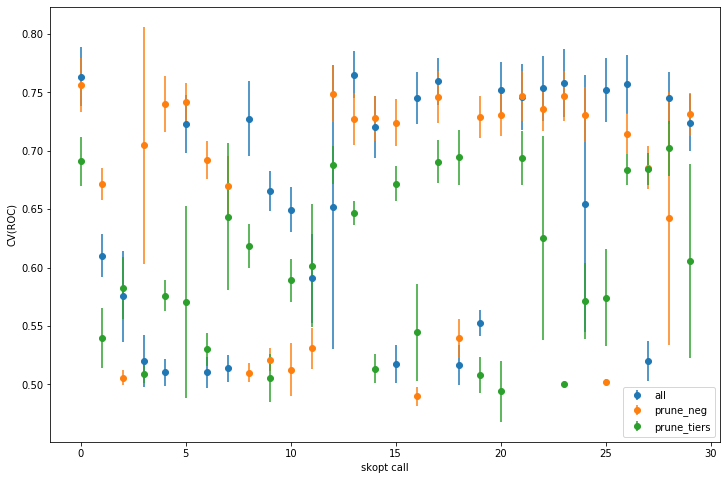

In [56]:
plot.plot_skopt_results(files, titles)

In [105]:
rates = []
for n in names:
    
    folds = 5
    files_roc = [ path + n + '/fold' + str(i) + '_history.h5' for i in range(folds)]
    tpr = [ pd.read_hdf(file, key = 'tpr')['tpr'].to_list() for file in files_roc]
    fpr = [ pd.read_hdf(file, key = 'fpr')['fpr'].to_list() for file in files_roc]
    rates.append((tpr, fpr))

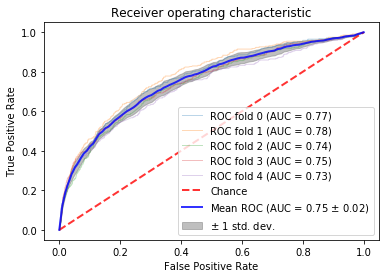

In [102]:
importlib.reload(plot)
plot.plot_cv_roc_curve(tpr, fpr)

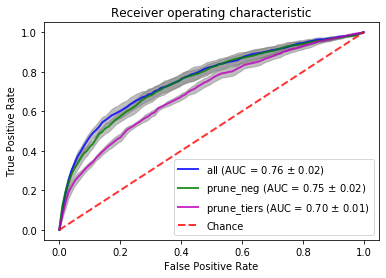

In [115]:
importlib.reload(plot)
plot.compare_roc(rates, titles)